#NEXT WORD PREDICTION PROJECT


NOTE: This is the model training file. The model has already been trained and saved in 'nextword1.h5'.
You DO NOT need to execute this notebook. 

In case you choose to, remember that training takes time, and resources. You are suggested to switch the runtime to GPU on Google Colab for training the model.

1) Before executing the notebook, make a file called 'genius_api_key.py' on your system and paste the following:

client_access_token = " {your token here} "

Upload this file when running the first cell.




2) Mount your Drive on colab and before running the code, 

make a new folder called 'ACM_Project' in your Drive such that its path is "/content/drive/MyDrive/ACM_Project".

In [ ]:
from google.colab import files
files.upload()

Saving genius_api_key.py to genius_api_key (1).py


{'genius_api_key.py': b'client_access_token="sp63zDqfWmym_nSbuueKxOVwhdUcmR04kLSs4CWBSyjmOe82gLVqygx0F-Sye7sK"'}

In [ ]:
from genius_api_key import client_access_token

In [ ]:
from genius_api_key import client_access_token
!pip install lyricsgenius
import lyricsgenius
genius = lyricsgenius.Genius(client_access_token, timeout = 120)
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Retrieving Artist ID from Genius

In [ ]:
artistNames = ["Taylor Swift","Ariana Grande", "Halsey", "Olivia Rodrigo", "Maisie Peters", "Gracie Abrams"]
artistID =[]
for artistName in artistNames:
    response = requests.get(f"http://api.genius.com/search?q={artistName}&access_token={client_access_token}")
    json_data = response.json()
    list_index = 0
    read_name = json_data['response']['hits'][0]['result']['artist_names']
    while (read_name != artistName) :
        list_index += 1
        read_name = json_data['response']['hits'][list_index]['result']['artist_names']
    artistID.append(json_data['response']['hits'][list_index]['result']['primary_artist']['id'])

Retrieving artist's albums and album IDs from Genius

*Checking for album in taylorswift_albums because Genius has several different versions of the same album depending upon release and it would create multiple copies of the same data*

In [ ]:
albumNames = []
albumIDs = []
all_albums = ["Taylor Swift" , "Fearless (Taylor’s Version)" , "Speak Now" , "Red (Taylor’s Version)" , "1989 (Deluxe)" , "reputation" , "Lover" , "folklore" , "evermore", "Yours Truly", "My Everything", "thank u, next", "Sweetener", "Dangerous Woman", "Positions","Badlands", "Hopeless Fountain Kingdom", "Manic", "If I Can't Have Love, I Want Power", "Sour", "You Signed Up For This", "It’s Your Bed Babe, It’s Your Funeral - EP", "Dressed Too Nice for a Jacket - EP", "Trying: Season 2 (Apple TV+ Original Series Soundtrack)", "minor", "This Is What It Feels Like"]
for ID in artistID:
    artistAlbums = genius.artist_albums( ID, per_page=50, page = 1 )
    for album in artistAlbums['albums'] :
        if album['name'] in all_albums :
            albumNames.append( album['name'] )
            albumIDs.append( album['id'] )
    try:
        artistAlbums = genius.artist_albums( ID, per_page=50, page = 2 )
        for album in artistAlbums['albums'] :
                if album['name'] in all_albums :
                    albumNames.append( album['name'] )
                    albumIDs.append( album['id']) 
        artistAlbums = genius.artist_albums( ID, per_page=50, page = 3 )
        for album in artistAlbums['albums'] :
            if album['name'] in all_albums :
                albumNames.append( album['name'] )
                albumIDs.append( album['id'] )
    except:
        print("not found")


In [ ]:
import pandas as pd
songDetails = pd.DataFrame(albumNames, index = [list(range(1, len(albumIDs) + 1))], columns = ["Album Names"])

In [ ]:
songDetails

,Album Names
1,Red (Taylor’s Version)
2,Fearless (Taylor’s Version)
3,evermore
4,folklore
5,Lover
6,reputation
7,1989 (Deluxe)
8,Speak Now
9,Taylor Swift
10,Positions


Retrieving all song names and IDs from each album from Genius

In [ ]:
songIDs = []
songCount = []
songNames = []
for ID in albumIDs :
    counter = 0
    albumSongs = genius.album_tracks( album_id = ID )
    for song in albumSongs['tracks'] :          
        songNames.append( song['song']['title'].replace( "\u200b", "" ))
        songIDs.append( song['song']['id'] )
        counter += 1
    songCount.append(counter)

In [ ]:
len(songIDs) #Total number of songs used

332

In [ ]:
songDetails["Total Songs"] = songCount
songDetails

,Album Names,Total Songs
1,Red (Taylor’s Version),31
2,Fearless (Taylor’s Version),27
3,evermore,15
4,folklore,16
5,Lover,18
6,reputation,19
7,1989 (Deluxe),19
8,Speak Now,15
9,Taylor Swift,16
10,Positions,14


Writing all the lyrics to a text file

In [ ]:
with open( f'/content/drive/MyDrive/ACM_Project/lyrics.txt','w',encoding = "utf8" ) as file:
    songLengths = pd.DataFrame(songNames, index = [list(range(1, len(songIDs) + 1))])
    length = []
    for ID in songIDs:
        lyrics = genius.lyrics(song_id = ID, remove_section_headers = True) 
        file.write( lyrics )
        length.append((len(lyrics.split())))


In [ ]:
songLengths["Word Count"] = length
songLengths

,0,Word Count
1,State of Grace (Taylor’s Version),371
2,Red (Taylor’s Version),328
3,Treacherous (Taylor’s Version),264
4,I Knew You Were Trouble (Taylor’s Version),411
5,All Too Well (Taylor’s Version),471
...,...,...
328,Under / Over,189
329,tehe,202
330,"I miss you, I’m sorry",325
331,Long Sleeves,322


Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
file = open(f"/content/drive/MyDrive/ACM_Project/lyrics.txt", "r", encoding = "utf8")
lines = []
for i in file:
    lines.append(i)

In [ ]:
data = ""
for i in lines:
    data = ' '. join(lines)    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('/content/drive/MyDrive/ACM_Project/tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

5945


In [ ]:
sequences = []

for i in range(5, len(sequence_data)):
    words = sequence_data[i-5:i+1]
    sequences.append(words)
sequences = np.array(sequences)

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:5])
    y.append(i[5])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [[ 729   15  906  301  253]
 [  15  906  301  253   68]
 [ 906  301  253   68   12]
 [ 301  253   68   12 1131]
 [ 253   68   12 1131  758]]
The responses are:  [  68   12 1131  758  112]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=5))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 10)             59450     
                                                                 
 lstm (LSTM)                 (None, 5, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 5945)              5950945   
                                                                 
Total params: 19,059,395
Trainable params: 19,059,395
Non-trainable params: 0
_________________________________________________________________


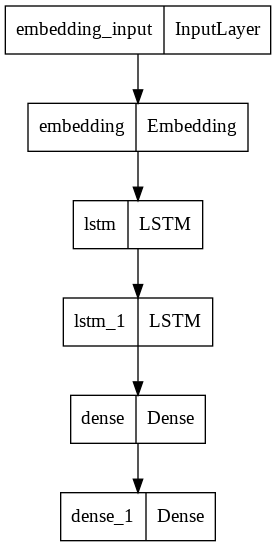

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='/content/drive/MyDrive/ACM_Project/model.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("/content/drive/MyDrive/ACM_Project/nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

# logdir = 'logsnextword1'
# tensorboard_Visualization = TensorBoard(log_dir = logdir)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [ ]:
history = model.fit(X, y, epochs = 30, batch_size=32, callbacks=[checkpoint, reduce])

Epoch 1/30
3909/3909 [==============================] - ETA: 0s - loss: 5.7914 - accuracy: 0.0722
Epoch 1: loss improved from inf to 5.79138, saving model to /content/drive/MyDrive/ACM_Project/nextword1.h5
3909/3909 [==============================] - 68s 15ms/step - loss: 5.7914 - accuracy: 0.0722 - lr: 0.0010
Epoch 2/30
3908/3909 [============================>.] - ETA: 0s - loss: 5.1549 - accuracy: 0.1185
Epoch 2: loss improved from 5.79138 to 5.15487, saving model to /content/drive/MyDrive/ACM_Project/nextword1.h5
3909/3909 [==============================] - 61s 15ms/step - loss: 5.1549 - accuracy: 0.1185 - lr: 0.0010
Epoch 3/30
3908/3909 [============================>.] - ETA: 0s - loss: 4.7206 - accuracy: 0.1544
Epoch 3: loss improved from 5.15487 to 4.72063, saving model to /content/drive/MyDrive/ACM_Project/nextword1.h5
3909/3909 [==============================] - 61s 15ms/step - loss: 4.7206 - accuracy: 0.1544 - lr: 0.0010
Epoch 4/30
3908/3909 [============================>.] - 